<a href="https://www.kaggle.com/code/a113ssa/image-classification-using-feedforward-networks-in?scriptVersionId=202283969" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical


from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

In [3]:
SEED_VALUE = 37

# to make training deterministic
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [4]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
SLICE_NUMBER = 10000

def slice_data(data):
    return data[:SLICE_NUMBER], data[SLICE_NUMBER:]

In [6]:
X_valid, X_train = slice_data(X_train_all)
y_valid, y_train = slice_data(y_train_all)

print(f'X_train: {X_train.shape}, X_valid: {X_valid.shape}, X_test: {X_test.shape}')

X_train: (50000, 28, 28), X_valid: (10000, 28, 28), X_test: (10000, 28, 28)


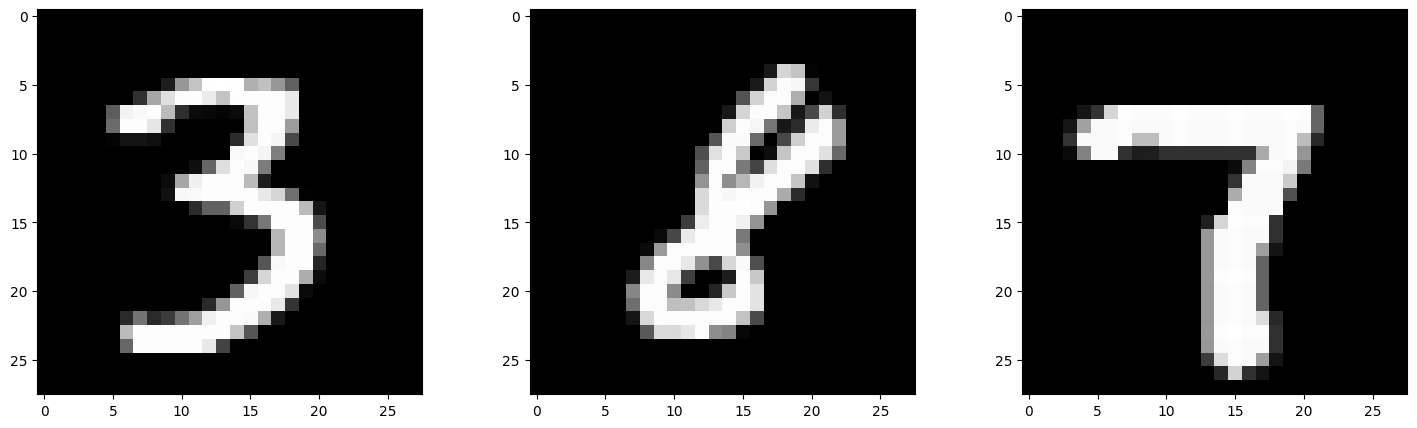

In [7]:
plt.figure(figsize=(18,5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.axis(True)
    plt.imshow(X_train[i], cmap='gray')
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

In [8]:
# from 2D array to 1D vector
def reshape(data):
    data = data.reshape((data.shape[0], 28 * 28))
    return data.astype('float32') / 255

In [9]:
X_train = reshape(X_train)
X_test = reshape(X_test)
X_valid = reshape(X_valid)

In [10]:
# one-hot encoding 
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [11]:
# model definition
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [13]:
training_results = model.fit(
    X_train,
    y_train,
    epochs=21,
    batch_size=64,
    validation_data=(X_valid, y_valid),
)

Epoch 1/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8569 - loss: 0.4828 - val_accuracy: 0.9574 - val_loss: 0.1474
Epoch 2/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9602 - loss: 0.1344 - val_accuracy: 0.9675 - val_loss: 0.1097
Epoch 3/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9733 - loss: 0.0886 - val_accuracy: 0.9710 - val_loss: 0.1005
Epoch 4/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9809 - loss: 0.0654 - val_accuracy: 0.9725 - val_loss: 0.0987
Epoch 5/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9859 - loss: 0.0499 - val_accuracy: 0.9733 - val_loss: 0.0998
Epoch 6/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9893 - loss: 0.0382 - val_accuracy: 0.9731 - val_loss: 0.1049
Epoch 7/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9913 - loss: 0.0301 - val_accuracy: 0.9722 - val_loss: 0.1210
Epoch 8/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9928 - loss: 0.0240 - val_accuracy: 0.

In [14]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig ,ax = plt.subplots(figsize=(15,4))
    
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
        
    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])
        
    plt.xlabel('Epoch')  
    plt.ylabel(ylabel)
    
    plt.title(title)
    
    plt.xlim([0, 20])
    plt.ylim(ylim)
    
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    
    plt.grid(True)
    
    plt.legend(metric_name)
    
    plt.show()
    plt.close()

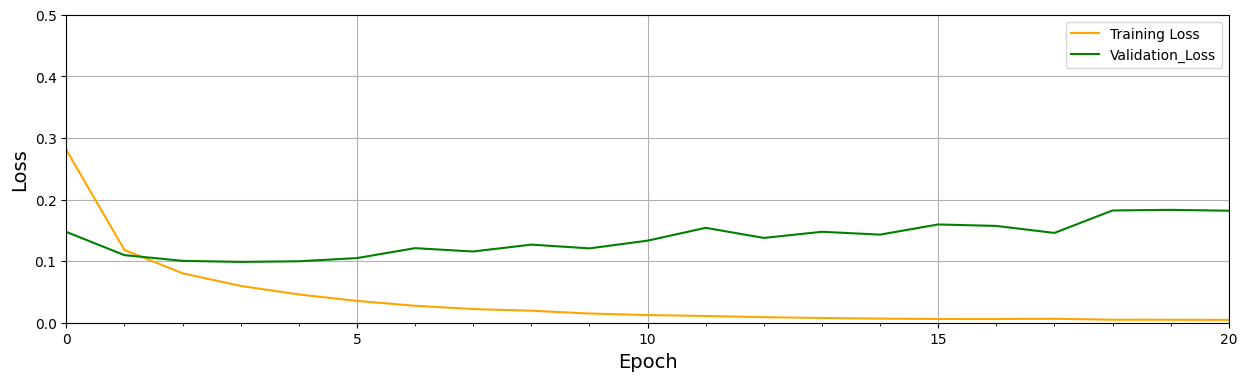

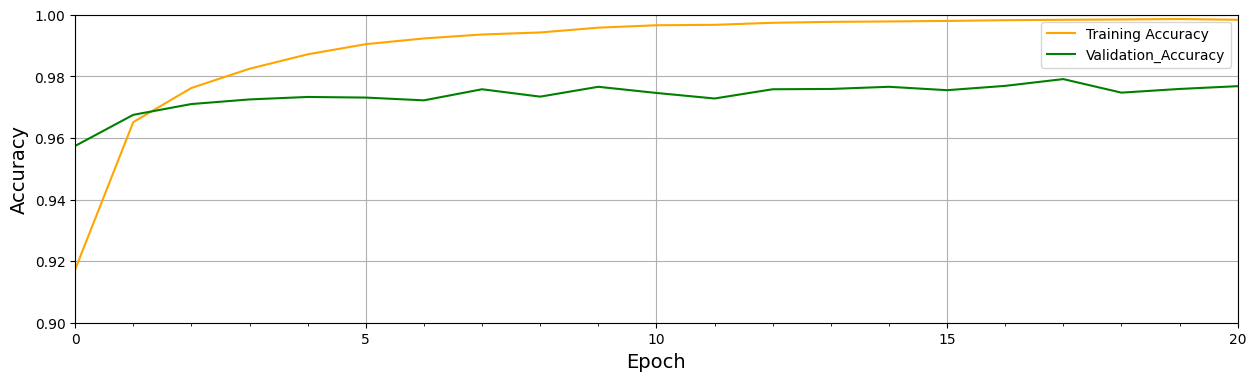

In [15]:
def retrieve_from_history(param):
    return training_results.history[param]

train_loss = retrieve_from_history('loss')
train_acc = retrieve_from_history('accuracy')
valid_loss = retrieve_from_history('val_loss')
valid_acc = retrieve_from_history('val_accuracy')

plot_results(
    [train_loss, valid_loss],
    ylabel='Loss',
    ylim=[0.0, 0.5],
    metric_name=['Training Loss', 'Validation_Loss'],
    color=['orange', 'g'],
)

plot_results(
    [train_acc, valid_acc],
    ylabel='Accuracy',
    ylim=[0.9, 1.0],
    metric_name=['Training Accuracy', 'Validation_Accuracy'],
    color=['orange', 'g'],
)

In [16]:
predictions = model.predict(X_test)

predicted_labels = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


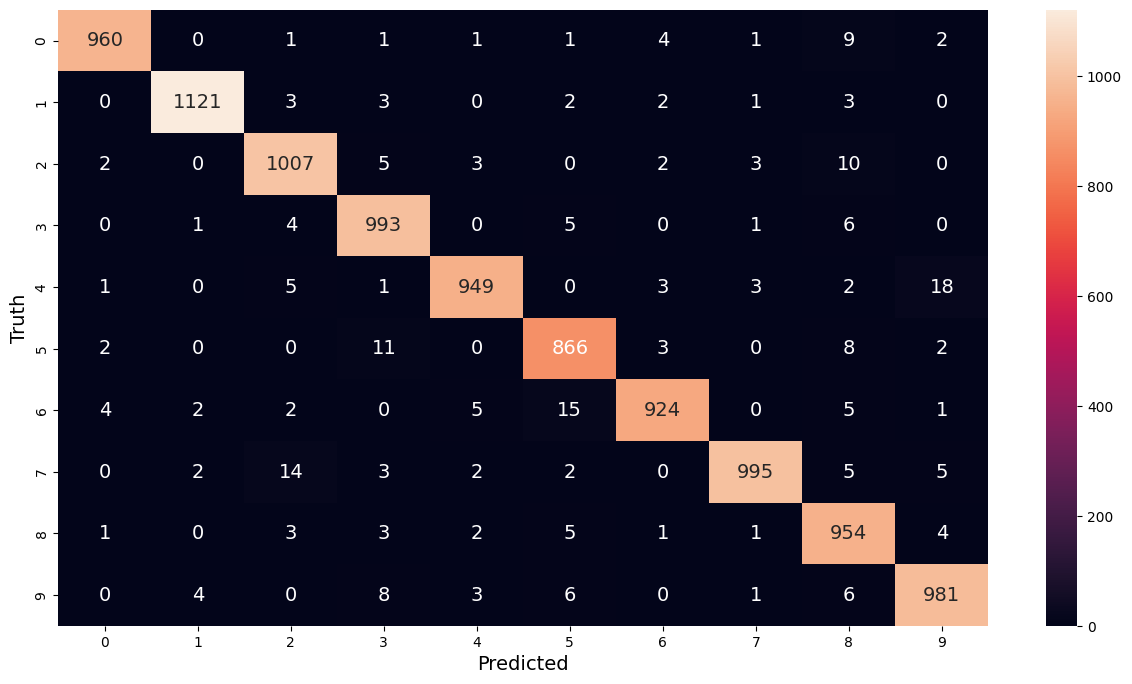

In [17]:
# converting one-hot encoded labels to integers
y_test_integer_labels = tf.argmax(y_test, axis=1)

cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

plt.figure(figsize=(15,8))

import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 14})

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()